# DT205/220/1 
## MATH1810
## Introduction to Scientific Python

## Notebook 9

## Matplotlib basics

This notebook follows Chapter 7 of Hill.

In [1]:
# Setup not required for this notebook, excessive outputs without assignments
# %run ./.setup.ipynb

## Basics

To use Matplotlib the following statements should appear at the start of your code

``
import matplotlib.pyplot as plt
import numpy as np
``

after which point, any of the attributes of the library are referenced using `plt.`


Note that, within the Jupyter notebook, to get Matplotlib plots to appear *inline* you also need to include the built-in Python *magic command*

``
%matplotlib inline
``


## Matplotlib basic objects

The main objects you will use to generate plots with Matplotlib are the `Figure` and `Axes` objects.

The `Axes` object is a region of the `Figure` on which the plot lines, labels, axes, etc are contained.

To create the `Figure` you use `plt.figure()`. There are various keywords which can be used with `plt.figure()`, the most useful of which is the `figsize` keyword which specifies the size of the figure in inches.


To create a single `Axes` object you can use `fig.add_subplot(111)`, where the `111` argument is a shorthand for the tuple `(1,1,1)` indicating repsectively a subplot in a figure with 1 row and 1 column 1 of subplots, placed in the first location, within the `Figure`. Note that it is possible to create up to 3 rows and 3 columns using this shorthand - after this you need to use the full tuple format.

Once the `Figure` object and an `Axes` object have been created, the `plot` method belonging to the `Axes` object may be used to generate a plot. The simplest way to do this is with two NumPy arrays for the $x$ and $y$ values in the form `ax.plot(x, y)`.

Finally, while not strictly necessary in this context, it is more generally required to use the `show` method of the `Figure` object to display the figure.


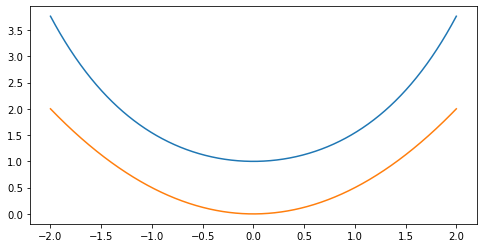

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
x = np.linspace(-2, 2, 1000)
ax.plot(x, np.cosh(x))
ax.plot(x, x**2 / 2)
plt.show()

### Adding labels

There are a wide array of options for altering features of your plots to make them more polished. One of the most common is to add labels to the figure.

To add labels to an `Axes` object, the `set_xlabel`, `set_ylabel`, `set_title` will set labels for the $x$, $y$, and overall subplot respectively. 

To add a legend to a subplot, the keyword `label` may be used in the call to the `plot` method. 
**It is required to use the `legend` method subsequently in order to get the legend to appear!**
The `legend` method of the `Axes` object can also be given a `loc` keyword to position the legend. The form of the location is one of 

``
upper left 
center
center right
center left
upper center
lower right
lower left
lower center
right
best
upper right
``

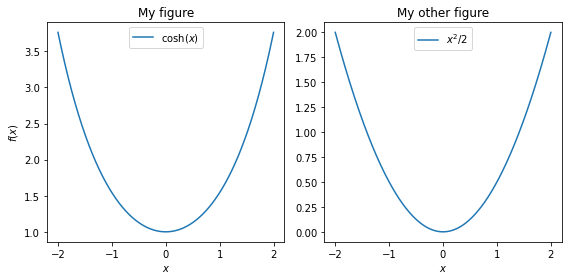

In [3]:
fig = plt.figure(figsize=(8,4))

#Figure with 1 row and 2 columns, 1st position
ax = fig.add_subplot(121)
x = np.linspace(-2, 2, 1000)
ax.plot(x, np.cosh(x),label='$\cosh(x)$')
ax.legend(loc='upper center')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_title('My figure')

#Figure with 1 row and 2 columns, 2nd position
ax = fig.add_subplot(122)
x = np.linspace(-2, 2, 1000)
ax.plot(x, x**2 / 2,label='$x^2/2$')
ax.legend(loc='upper center')
ax.set_xlabel('$x$')
ax.set_title('My other figure')

fig.tight_layout()
plt.show()

## Two-dimensional data plotting

There are a number of ways to plot two-dimensional data usinf Matplotlib. We will consider two: heatmaps, and surface plots.


### Heatmaps

A *heatmap* is created by considering each value in an array as a pixel in a plot. The `Axes` method `imshow` is a straightforward way of creating such an image.

A major consideration in plotting heatmaps is exactly how the pixel values are to be interpreted as colours. The `matplotlib.cm` *colormap* module determines this. Common colourmaps are `cm.hot`, `cm.bone`, `cm.winter`, `cm.jet`, `cm.Greys` and `cm.hsv` and are implemented in `imshow` using the `cmap` keyword.

A second consideration is how the pixels are *merged* from one value to the next. This is determined via the `interpolation` keyword of `imshow`. Setting the keyword to `bilinear` carries out smoothing between values, whereas using `nearest` jumps discontinuously from one pixel value to the next. 


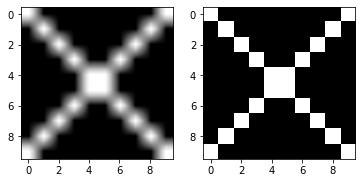

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Make an array with ones in the shape of an ’X’
a = np.eye(10,10)
a += a[::-1,:]
fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(a, interpolation='bilinear', cmap=cm.Greys_r)
ax2 = fig.add_subplot(122)
# ’nearest’ interpolation - faithful but blocky
ax2.imshow(a, interpolation='nearest', cmap=cm.Greys_r)
plt.show()

#### Example Barnsley Fern

The *Barnsley Fern* is a fractal that looks like a fern. The code below shows how the fractal may be generated and plotted using `imshow`.


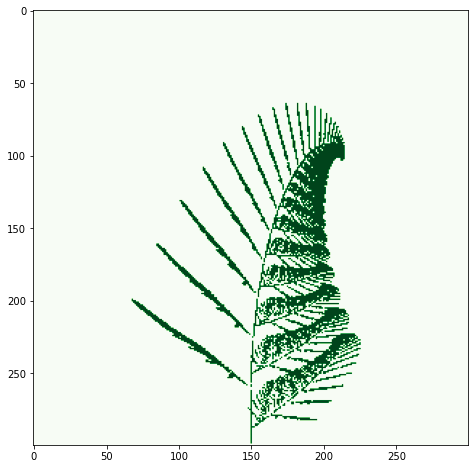

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#Original lambda functions
#f1 = lambda x,y: (0., 0.16*y)
#f2 = lambda x,y: (0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6)
#f3 = lambda x,y: (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6)
#f4 = lambda x,y: (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)


f1 = lambda x,y: (0., 0.16*y)
f2 = lambda x,y: (0.85*x + 0.04*y, -0.2*x + 0.85*y + 1.6) # was -0.04
f3 = lambda x,y: (-0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6) #was 0.2
f4 = lambda x,y: (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)


fs = [f1, f2, f3, f4]

npts = 50000
# Canvas size (pixels)
width, height = 300, 300
aimg = np.zeros((width, height))
x, y = 0, 0
for i in range(npts):
    # Pick a random transformation and apply it
    f = np.random.choice(fs, p=[0.01, 0.85, 0.07, 0.07])
    x, y = f(x,y)
    # Map (x,y) to pixel coordinates.
    # NB we "know" that -2.2 < x < 2.7 and 0 <= y < 10
    ix, iy = int(width / 2 + x * width / 10), int(y * height / 12)
    # Set this point of the array to 1 to mark a point in the fern 
    aimg[iy, ix] = 1
    
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)    
ax1.imshow(aimg[::-1,:], cmap=cm.Greens)
plt.show()

# Heading 

I can write text in here and it will look pretty good.


Copy and paste your Word text in here as plain text.




### Surface plots

The last kind of plot we will look at it a surface plot. To use a plot of this sort, the `Axes3D` module from the `mpl_toolkits.mplot3d` library is required. Then the `projection` keyword must be supplied to the `add_subplot` method with a value of `3d`.


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

L, n = 2, 400
x = np.linspace(-L, L, n)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z,rstride=20, cstride=20, cmap=cm.hot)
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_zticks([0, 0.5, 1])
ax.set_title('Surface plot')

plt.show()


## **CA**: Barnsley Fern and Chaos Game

For this major component CA, you will need to write **your own** notebook. When you have produced your notebook, which should be substantial (a few pages) and contain discussion and figures illustrating your results, you will need to download it *as a notebook* (.ipynb format) and then submit the notebook file via Brightspace.  

**Do not copy codes or results from online sources.**
 

The CA has two parts with equal marks:


* Part 1  

    Investigate the Barnesley Fern code above and write a report on it. You may wish to try varying the parameters (slightly) to generate your own fractals.


* Part 2 
    
    The  *Chaos Game* is an algorithm for generating a fractal:
    
    * define the $n$ vertices of a regular polygon;
    * choose an initial point, $(x_0, y_0)$ at random within the polygon;
    * generate a sequence of points, starting with $(x_0, y_0)$, where each point is a fraction $r$ of the distance between the previous one and a polygon vertex chosen at random. 

    Write **your own** Python program for the above algorithm, and *using NumPy and Matplotlib*, explore the Chaos Game for different values of $n$ and $r$ and present your findings.

